# Zad1

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>



## Generacja danych

In [54]:
# left and right edge of an interval
l_i = 0
r_i = 9

# numbers of points to generate
num_of_points = 8

# interval of generatable numbers
l_g = -3
r_g = 3

# function for generating numbers
rand_from_interv() = rand() * (r_g - l_g) + l_g

xs = [i for i in l_i:((r_i - l_i)/(num_of_points - 1)):r_i]
xsf = l_i:(r_i-l_i)/(num_of_points-1)/10:r_i+(r_i-l_i)/(num_of_points-1)/10

ys = [rand_from_interv() for i in xs]

8-element Vector{Float64}:
 -0.12988287707030954
  0.3205350686734594
  0.9361543160729058
 -2.2555144795586655
 -1.4225131728406422
  2.287077366808572
  2.7021523683940654
  1.6028049562235287

## Kod

In [55]:
function build_numerator(i, xs)
    function numerator(x)
        product = 1
        for j in 1:length(xs)
            if i != j
                product *= (x - xs[j])
            end
        end
        return product
    end
    return numerator
end


function denominator(i, xs)
    product = 1
    for j in 1:length(xs)
        if i != j
            product *= xs[i] - xs[j]
        end
    end
    return product
end


function build_L(i, xs)
    d = denominator(i, xs)
    n = build_numerator(i, xs)
    function L(x)
        return n(x) / d
    end
    return L
end


function LagrangeInterpolation(xs, ys)
    L_array = [build_L(i, xs) for i in 1:length(xs)]
    function P(x)
        res = 0
        for i in 1:length(xs)
            res += ys[i] * L_array[i](x)
        end
        return res
    end
    
    return P
end

LagrangeInterpolation (generic function with 1 method)

In [56]:
P_Lagrange = LagrangeInterpolation(xs, ys)

(::var"#P#85"{Vector{Float64}, Vector{Float64}, Vector{var"#L#82"{var"#numerator#81"{Int64, Vector{Float64}}, Float64}}}) (generic function with 1 method)

In [57]:
ysf = [P_Lagrange(y) for y in xsf]

71-element Vector{Float64}:
 -0.12988287707030954
 -1.2844673618488902
 -1.9426768894616662
 -2.214376264207989
 -2.1943892819191695
 -1.9638057467851666
 -1.5912212910833425
 -1.1339115702387697
 -0.6389424056455801
 -0.14421744767885308
  0.3205350686734594
  0.7328349031290841
  1.0765801519509606
  ⋮
  2.873581159643983
  2.702152368394065
  2.501387946047431
  2.2813937087794773
  2.054058612633531
  1.8330219386093871
  1.633614901509679
  1.4727751101146012
  1.3689323062554577
  1.3418638103575469
  1.4125181010229266
  1.6028049562235323

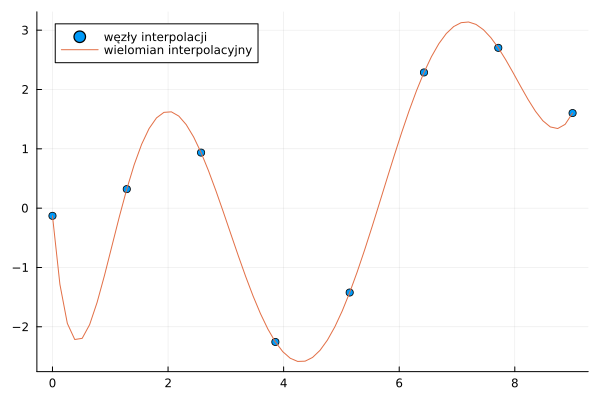

In [58]:
using Plots
scatter(xs, ys, label = "węzły interpolacji")
plot!(xsf, ysf, label="wielomian interpolacyjny")

# Zad2

Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>



## Słowem wyjaśnienia

Nie rozumiem do końca jak ma się zachowoywać "obiekt interpolacyjny" i współdziałać z funkcją wyliczającą jako wartość za pomocą schematu Hornera. Problem w zasadzie sprowadza się do wyboru API i konwencji, ale piszę, aby poinformować.

Pana polecenie sugeruje, że "obiekt interpolacyjny" powinien być oddzielony od funkcji wyliczającej jego wartość (podpunkt B mówi, że fukcja ma przyjmować obiekt interpolacyjny). Tymczasem załączony link wskazuje, że stworzony obiekt interpoacyjny ma być bezpośrednio "wołalny" i zwracać wartość wielomianu dla podanego punktu.

Zdecydowałem postąpić według drugiej sugestii, dlatego schemat Hornera jest wpleciony w funkcję interpolującą.

## Kod

In [59]:
function NewtonInterpolation(xs, ys)
    n = length(xs)
    
    if length(ys) != n
        error("xs and ys need to have the same length")
    end

    A = Array{Float64, 2}(undef, n, n)

    for i in 1:n
        A[i, 1] = ys[i]
    end

    # i - row, j - column
    for j in 2:n 
        for i in 1:n-j+1
            A[i, j] =
                (A[i + 1, j - 1] - A[i, j - 1]) /
                (xs[i + j - 1] - xs[i]);
        end
    end
    
    # we use only elements in the first row
    B = [A[1, i] for i in 1:n]
    
    function horner_for_newton(x)
        res = B[n]
        for i in n-1:-1:1
            res = res * (x - xs[i]) + B[i]
        end
        return res
    end

    return horner_for_newton
end

NewtonInterpolation (generic function with 1 method)

In [60]:
newt = NewtonInterpolation(xs, ys)

(::var"#horner_for_newton#90"{Vector{Float64}, Vector{Float64}, Int64}) (generic function with 1 method)

In [61]:
ysf = [newt(x) for x in xsf]

71-element Vector{Float64}:
 -0.12988287707030954
 -1.2844673618488895
 -1.9426768894616655
 -2.2143762642079894
 -2.194389281919169
 -1.9638057467851657
 -1.5912212910833412
 -1.133911570238769
 -0.6389424056455796
 -0.14421744767885278
  0.3205350686734594
  0.7328349031290842
  1.0765801519509601
  ⋮
  2.8735811596439818
  2.702152368394058
  2.5013879460474318
  2.2813937087794973
  2.054058612633505
  1.8330219386093491
  1.6336149015096464
  1.4727751101145885
  1.3689323062554226
  1.3418638103575462
  1.4125181010228887
  1.6028049562234978

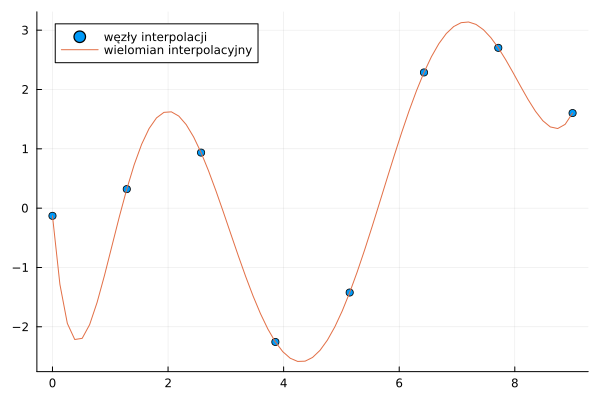

In [62]:
using Plots
scatter(xs, ys, label = "węzły interpolacji")
plot!(xsf, ysf, label="wielomian interpolacyjny")

# Zad3

Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

## Generowanie danych

In [63]:
# left and right edge of an interval
l_i = 0
r_i = 100

# numbers of points to generate
num_of_points = 10

# interval of generatable numbers
l_g = -3
r_g = 10

10

In [64]:
# function for generating numbers
rand_from_interv() = rand() * (r_g - l_g) + l_g

xs = [i for i in l_i:((r_i - l_i)/(num_of_points - 1)):r_i]
xsf = l_i:(r_i-l_i)/(num_of_points-1)/10:r_i

ys = [rand_from_interv() for i in xs]

10-element Vector{Float64}:
  4.923872575852351
 -1.5414174600053512
  3.518665290120963
  5.31138127492563
  3.242742563785148
  7.075262813055499
  3.547640214865522
  8.01483849207842
  4.716723635866023
  3.765005302945025

## Interpolacje

### Punkty

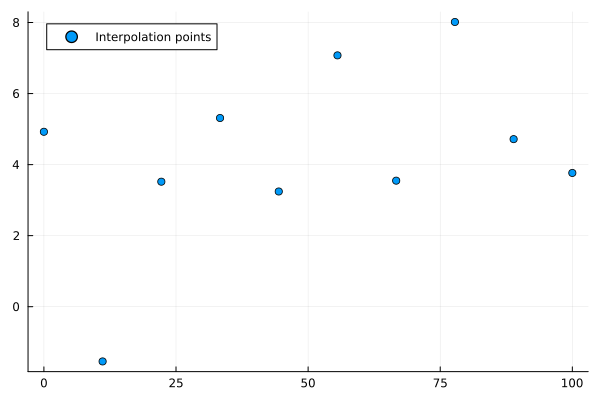

In [65]:
scatter(xs, ys, label="Interpolation points")

### Lagrange'a

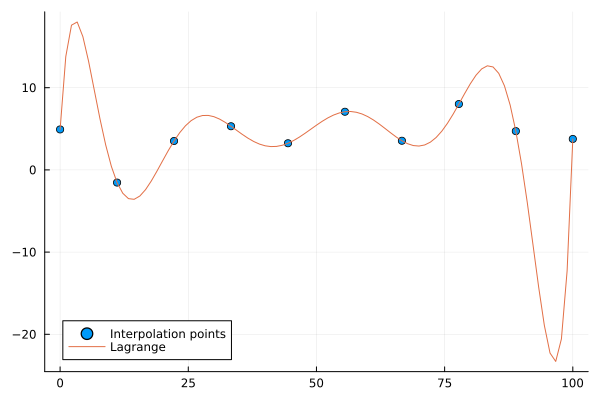

In [66]:
lagr = LagrangeInterpolation(xs, ys)
ysf = [lagr(x) for x in xsf]
plot!(xsf, ysf, label = "Lagrange")

### Newtona

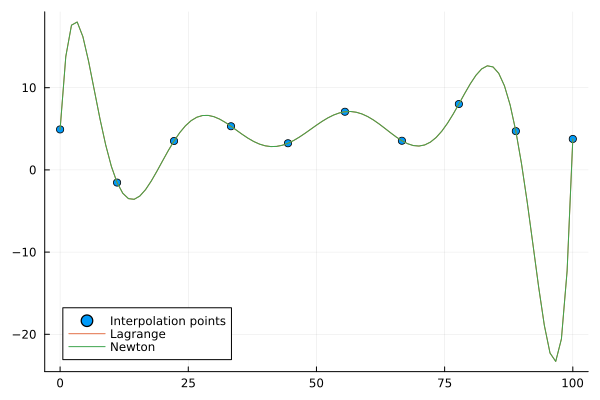

In [67]:
newt = NewtonInterpolation(xs, ys)
ysf = [newt(x) for x in xsf]
plot!(xsf, ysf, label = "Newton")

### Z pakietu

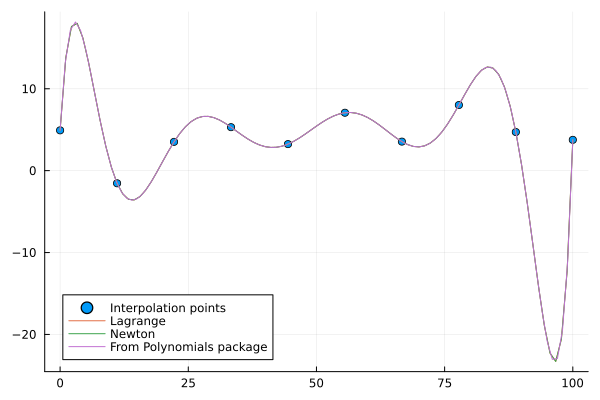

In [68]:
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="From Polynomials package")

## Komentarz

Zauważamy, że wszystkie 3 wielomiany, będące wynikami interpolacji, są takie same.
Wynika to z tego, że wszystkie metody korzystają z interpolacji wielomianami oraz istnieje twierdzenie o jednoznaczności rozwiązania, tzn. przez $n$ punktów na płaszczyźnie możemy przeprowadzić tylko jeden wielomian stopnia $\le n-1$

# Zad4

## Importy

In [69]:
#import Pkg
#Pkg.add("DataFrames")
using DataFrames

Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

## Pomiary

In [70]:
using Polynomials
start = 100
step = 120
num_of_measurements = 8

measurements = DataFrame(interp_type = String[], num_of_nodes = Int64[], time = Float64[])
interp_eval = DataFrame(interp_type = String[], measurement_type = String[], num_of_nodes = Int64[], time = Float64[])

for num_of_nodes in start:step:(start+step*num_of_measurements)
    xs = 1:num_of_nodes
    ys = [rand() for _ in 1:num_of_nodes]
    
    
    for iter in 1:10
        interp_time = @elapsed lagr = LagrangeInterpolation(xs, ys)
        eval_time = @elapsed [lagr(x) for x in xsf]
        
        push!(interp_eval, ["lagrange", "interpolation", num_of_nodes, interp_time])
        push!(interp_eval, ["lagrange", "evaluation", num_of_nodes, eval_time])
        push!(measurements, ["lagrange", num_of_nodes, interp_time + eval_time])
    end
    
    
    
    for iter in 1:10
        interp_time = @elapsed newt = NewtonInterpolation(xs, ys)
        eval_time = @elapsed [lagr(x) for x in xsf]
        
        push!(interp_eval, ["newton", "interpolation", num_of_nodes, interp_time])
        push!(interp_eval, ["newton", "evaluation", num_of_nodes, eval_time])
        push!(measurements, ["newton", num_of_nodes, interp_time + eval_time])
    end
    
    for iter in 1:10
        sum_time = 0
        sum_time += @elapsed fit(xs, ys)
        push!(measurements, ["package", num_of_nodes, sum_time])
    end
    
        
end

measurements

Row,interp_type,num_of_nodes,time
,String,Int64,Float64
1,lagrange,100,0.298073
2,lagrange,100,0.0050831
3,lagrange,100,0.0048642
4,lagrange,100,0.0048603
5,lagrange,100,0.0049518
6,lagrange,100,0.005005
7,lagrange,100,0.0049184
8,lagrange,100,0.004874
9,lagrange,100,0.0050332


## Przekształcanie dataframe'ów

In [71]:
using Statistics
measurements_grouped = groupby(measurements, [:interp_type, :num_of_nodes])
measurements_plottable = combine(measurements_grouped, "time" => mean, "time" => std)

interp_eval_grouped = groupby(interp_eval, [:interp_type, :measurement_type, :num_of_nodes])
interp_eval_plottable = combine(interp_eval_grouped, "time" => mean, "time" => std)

Row,interp_type,measurement_type,num_of_nodes,time_mean,time_std
,String,String,Int64,Float64,Float64
1,lagrange,interpolation,100,0.0129464,0.0408126
2,lagrange,evaluation,100,0.0213061,0.0518844
3,newton,interpolation,100,0.0115247,0.036283
4,newton,evaluation,100,0.0133743,0.0282127
5,lagrange,interpolation,220,0.00016476,2.73316e-5
6,lagrange,evaluation,220,0.0242812,0.00157707
7,newton,interpolation,220,0.00040823,0.000134263
8,newton,evaluation,220,0.0234693,0.00092011
9,lagrange,interpolation,340,0.00040305,0.000101638


## Rysowanie wykresów

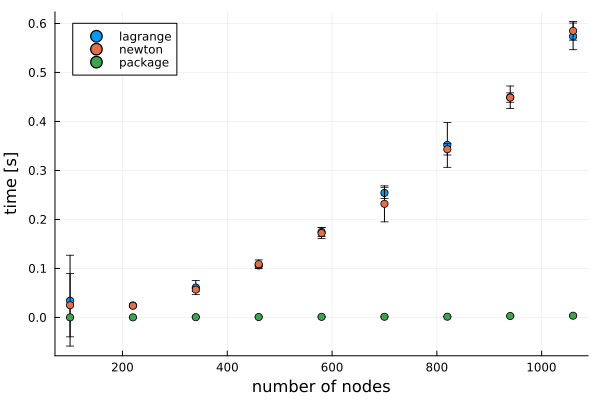

In [72]:
scatter(measurements_plottable.num_of_nodes,
    measurements_plottable.time_mean,
    yerror = measurements_plottable.time_std,
    group=measurements_plottable.interp_type,
    xlabel = "number of nodes",
    ylabel = "time [s]")

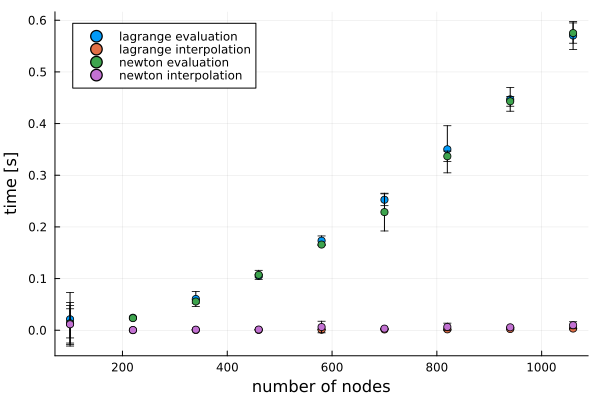

In [73]:
scatter(interp_eval_plottable.num_of_nodes,
    interp_eval_plottable.time_mean,
    yerror = interp_eval_plottable.time_std,
    group = (interp_eval_plottable.interp_type, interp_eval_plottable.measurement_type),
    xlabel = "number of nodes",
    ylabel = "time [s]")

# Zad5

Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

# Zad6

Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 